# **Cek Versi Tesorflow & Keras**

In [ ]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.17.1
Keras version: 3.5.0


•	Memastikan versi TensorFlow dan Keras yang digunakan kompatibel dengan implementasi program.<br>
•	Mengimpor library TensorFlow (tf) dan Keras.<br>
•	Mencetak versi library untuk memastikan keandalannya.

# **Accessing & Download Dataset From Kaggle**


In [ ]:
!pip install kaggle

In [ ]:
! mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
brain-tumor-mri-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


•	Mengakses dan mengunduh dataset dari Kaggle.<br>
•	Memastikan alat CLI Kaggle tersedia untuk unduhan.<br>

# **Prepocessing & Exploration Dataset**

•	Mengekstrak dataset, menghitung distribusi kelas, dan memvisualisasi gambar sampel.<br>
•	Menggunakan OpenCV untuk membaca gambar dan Matplotlib untuk visualisasi.<br>
•	Menghitung jumlah sampel di setiap kelas (Training dan Testing).

In [ ]:
import zipfile

with zipfile.ZipFile('brain-tumor-mri-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('brain-tumor-mri-dataset')

In [ ]:
# Import Library
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Subfolder: Training | Class: meningioma - Jumlah Sampel: 1339


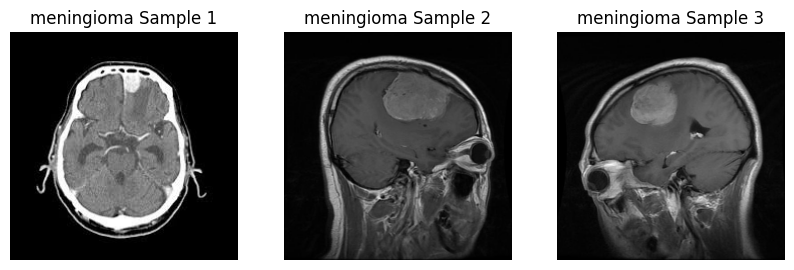

Subfolder: Training | Class: pituitary - Jumlah Sampel: 1457


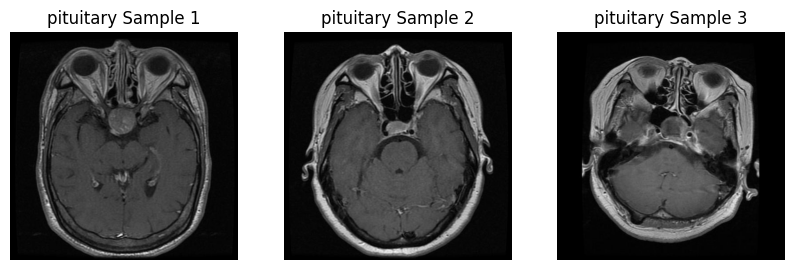

Subfolder: Training | Class: glioma - Jumlah Sampel: 1321


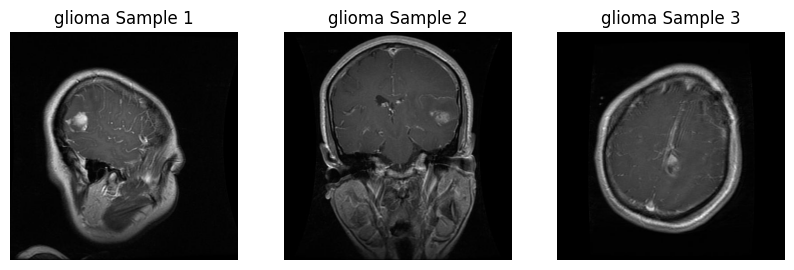

Subfolder: Training | Class: notumor - Jumlah Sampel: 1595


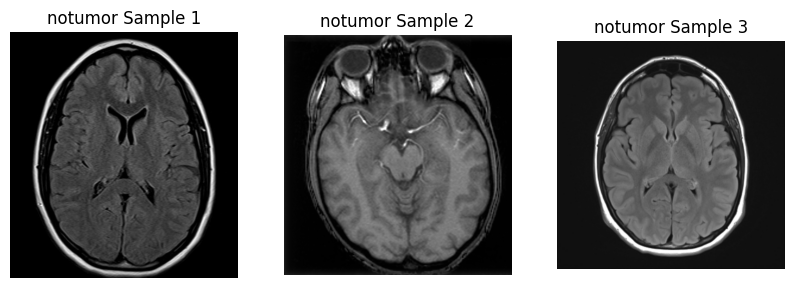

Subfolder: Testing | Class: meningioma - Jumlah Sampel: 306


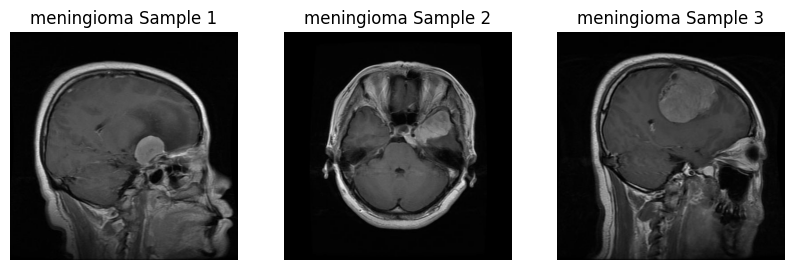

Subfolder: Testing | Class: pituitary - Jumlah Sampel: 300


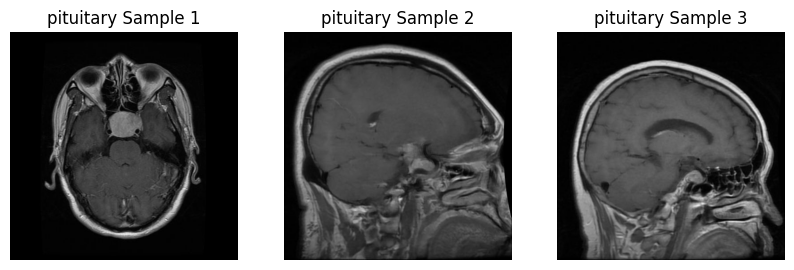

Subfolder: Testing | Class: glioma - Jumlah Sampel: 300


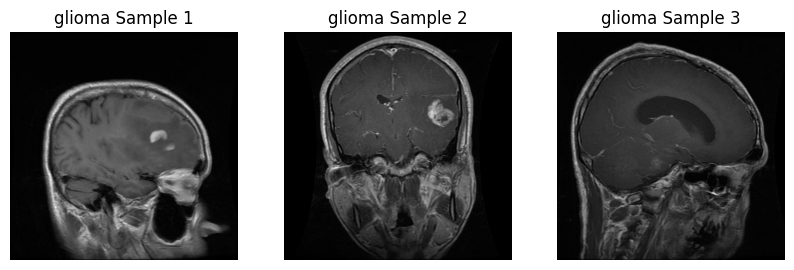

Subfolder: Testing | Class: notumor - Jumlah Sampel: 405


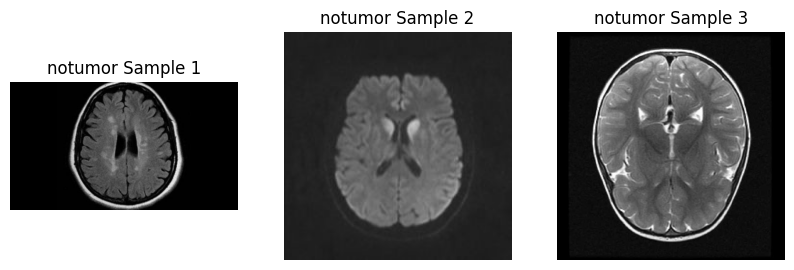

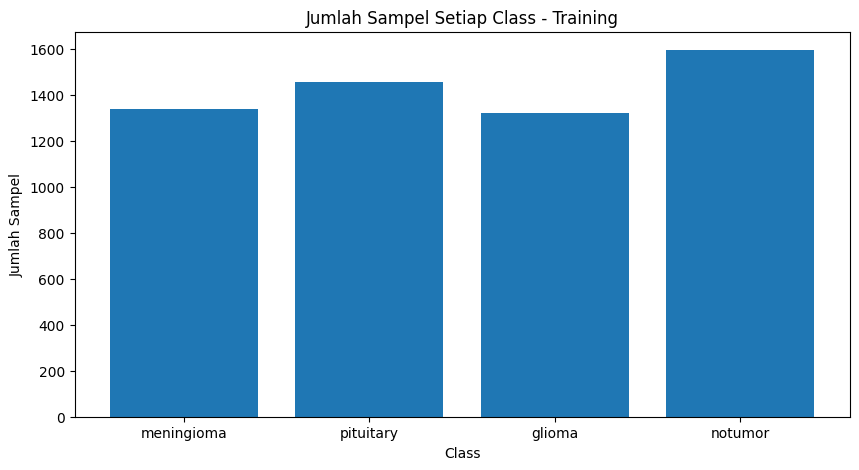

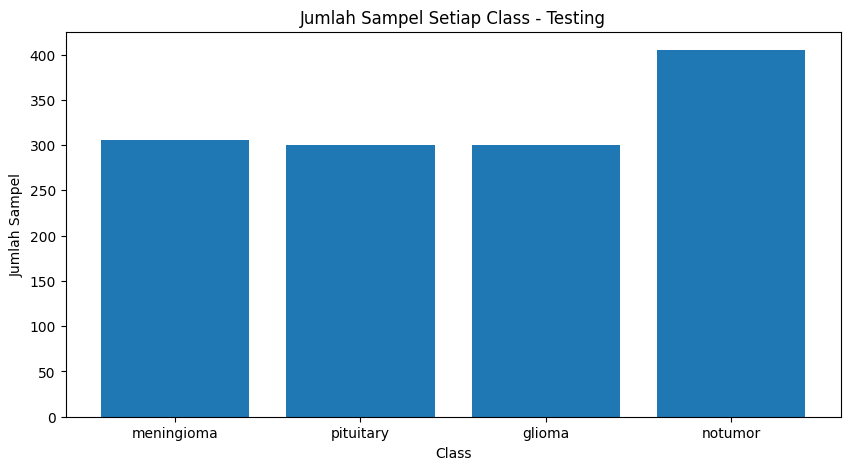

In [ ]:
# Definisikan Lokasi Folder Dataset
base_dir = 'brain-tumor-mri-dataset'
sub_dirs = ['Training', 'Testing']

# Dictionary untuk menyimpan jumlah sampel setiap class
sample_count = {'Training': {}, 'Testing': {}}

# Loop melalui folder Training dan Testing
for sub_dir in sub_dirs:
    sub_dir_path = os.path.join(base_dir, sub_dir)

    # Loop melalui setiap class dalam subfolder
    for class_name in os.listdir(sub_dir_path):
        class_folder = os.path.join(sub_dir_path, class_name)

        # Pastikan di loop adalah folder, bukan file
        if os.path.isdir(class_folder):
          image_files = os.listdir(class_folder)
          if len(image_files) == 0:
              print(f"Folder {class_name} di {sub_dir} kosong, cek dataset Anda.")
              continue
          num_images = len(image_files)
          sample_count[sub_dir][class_name] = num_images

          # Tampilkan gambar sampel menggunakan OpenCV
          print(f"Subfolder: {sub_dir} | Class: {class_name} - Jumlah Sampel: {num_images}")
          plt.figure(figsize=(10, 5))
          for i, image_file in enumerate(image_files[:3]):
              image_path = os.path.join(class_folder, image_file)
              image = cv2.imread(image_path)  # Membaca gambar menggunakan OpenCV
              image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
              plt.subplot(1, 3, i + 1)
              plt.imshow(image)
              plt.title(f"{class_name} Sample {i + 1}")
              plt.axis('off')
          plt.show()

# Tampilkan distribusi sampel setiap class
for sub_dir in sub_dirs:
  plt.figure(figsize=(10, 5))
  plt.bar(sample_count[sub_dir].keys(), sample_count[sub_dir].values())
  plt.xlabel('Class')
  plt.ylabel('Jumlah Sampel')
  plt.title(f'Jumlah Sampel Setiap Class - {sub_dir.capitalize()}')
  plt.show()

# **Split Model**

•	Memisahkan dataset menjadi bagian Training, Validation, dan Testing.<br>
•	Memvalidasi keberadaan folder dan file kelas.<br>
•	Membagi dataset menggunakan train_test_split dengan rasio yang ditentukan (80-10-10).<br>
•	Memindahkan file ke direktori baru sesuai set (train, val, test).

In [ ]:
from sklearn.model_selection import train_test_split
import os
import shutil

# Definisikan Lokasi Folder Dataset
base_dir = 'brain-tumor-mri-dataset'
sub_dirs = ['Training', 'Testing']

# List tiap Class
classes = ["glioma", "meningioma", "notumor", "pituitary"]

# Ratio train, validation, dan test sets
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

# Loop melalui folder Training dan Testing
for sub_dir in sub_dirs:
    sub_dir_path = os.path.join(base_dir, sub_dir)

    # Loop tiap class
    for class_name in classes:
        # Path ke folder class saat ini
        class_dir = os.path.join(sub_dir_path, class_name)

        # Validasi jika folder class ada
        if not os.path.exists(class_dir):
            print(f"Class folder {class_dir} tidak ditemukan, lewati.")
            continue

        # List semua file dalam folder class
        files = os.listdir(class_dir)

        # Validasi jika folder kosong
        if len(files) == 0:
            print(f"Folder {class_dir} kosong, tidak ada file untuk diproses.")
            continue

        # Split files menjadi train, val, test menggunakan sklearn train_test_split
        # Split pertama: train (80%), sisanya (20%)
        train_files, remaining_files = train_test_split(files, train_size=train_ratio, random_state=42)

        # Split kedua: val (10%), test (10%)
        val_files, test_files = train_test_split(remaining_files, train_size=0.5, random_state=42)

        # Membuat direktori baru untuk train, validation, dan test sets
        for folder_name, file_list in [("train", train_files), ("val", val_files), ("test", test_files)]:
            folder_path = os.path.join(base_dir, folder_name, class_name)
            os.makedirs(folder_path, exist_ok=True)

            # Pindahkan file ke direktori yang sesuai
            for file in file_list:
                src = os.path.join(class_dir, file)
                dst = os.path.join(folder_path, file)
                shutil.move(src, dst)

        # Hapus folder kosong
        if not os.listdir(class_dir):
            os.rmdir(class_dir)

# **Augmentation Data & Normalization**

•	Meningkatkan variasi dataset menggunakan augmentasi dan normalisasi.<br>
•	Augmentasi: Menambahkan variasi seperti rotasi, pergeseran, zoom, dll.<br>
•	Normalisasi: Menskalakan nilai piksel ke rentang [0,1].<br>
•	Generator: Membuat generator untuk train, val, dan test.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np

# Definisikan Lokasi Folder Dataset
base_dir = 'brain-tumor-mri-dataset'

# Dimensi sebuah gambar
img_width, img_height = 150, 150

# ukuran Batch image
batch_size = 32

# Data augmentation dan normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],  # Menambahkan variasi kecerahan
    channel_shift_range=20.0  # Menambahkan variasi saluran warna
)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    directory=os.path.join(base_dir, 'train'),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='sparse')

val_generator = val_datagen.flow_from_directory(
    directory=os.path.join(base_dir, 'val'),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='sparse')

test_generator = test_datagen.flow_from_directory(
    directory=os.path.join(base_dir, 'test'),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False)

y_train = train_generator.classes
y_val = val_generator.classes
y_test = test_generator.classes

Found 5616 images belonging to 4 classes.
Found 702 images belonging to 4 classes.
Found 705 images belonging to 4 classes.


# **Model CNN**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# 4 layers convolutional & pooling
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Fully connected layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 15, 15, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,815,428 (26.00 MB)

 Trainable params: 6,814,468 (26.00 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard
from sklearn.utils.class_weight import compute_class_weight

# Early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6
)

In [ ]:
# Fit the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr],
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


176/176 ━━━━━━━━━━━━━━━━━━━━ 75s 342ms/step - accuracy: 0.4304 - loss: 4.4037 - val_accuracy: 0.2593 - val_loss: 3.1500 - learning_rate: 0.0010
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 49s 262ms/step - accuracy: 0.5299 - loss: 1.1274 - val_accuracy: 0.2536 - val_loss: 2.4005 - learning_rate: 0.0010
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 80s 257ms/step - accuracy: 0.5928 - loss: 0.9443 - val_accuracy: 0.5655 - val_loss: 0.9881 - learning_rate: 0.0010
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 83s 260ms/step - accuracy: 0.6577 - loss: 0.8503 - val_accuracy: 0.7464 - val_loss: 0.6772 - learning_rate: 0.0010
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 82s 258ms/step - accuracy: 0.6684 - loss: 0.8156 - val_accuracy: 0.4601 - val_loss: 1.8007 - learning_rate: 0.0010
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 46s 255ms/step - accuracy: 0.6956 - loss: 0.7605 - val_accuracy: 0.6026 - val_loss: 1.4591 - learning_rate: 0.0010
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 47s 257ms/step - accuracy: 0.7283 - loss:

•	Membangun, melatih, dan mengevaluasi model CNN untuk klasifikasi gambar.<br>
•	Pada arsitektur model menambahkan 4 lapisan convolusi dan pooling. Serta lapisan Fully Connected (Dense) dengan dropout untuk menghindari overfitting<br>
•	Pada kompilasi model menggunakan Optimizer Adam. Serta Loss function Sparse Categorical Crossentropy.<br>
•	Melatih model dengan Early Stopping untuk menghentikan pelatihan jika performa tidak meningkat.<br>
•	Melatih model dengan reduce untuk mengurangi laju pembelajaran (learning rate) secara dinamis selama proses pelatihan model.

# **Visualisasi Evaluasi Accuracy Model**

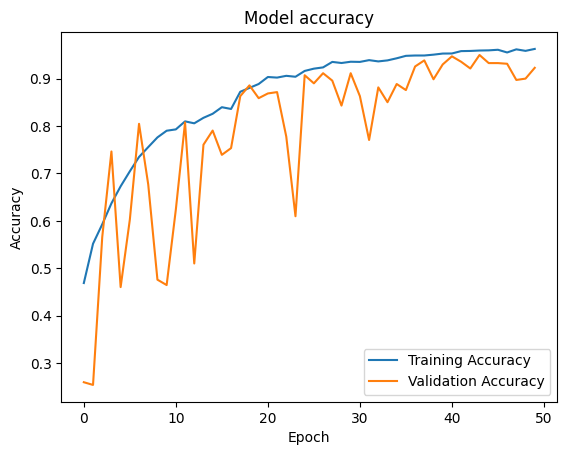

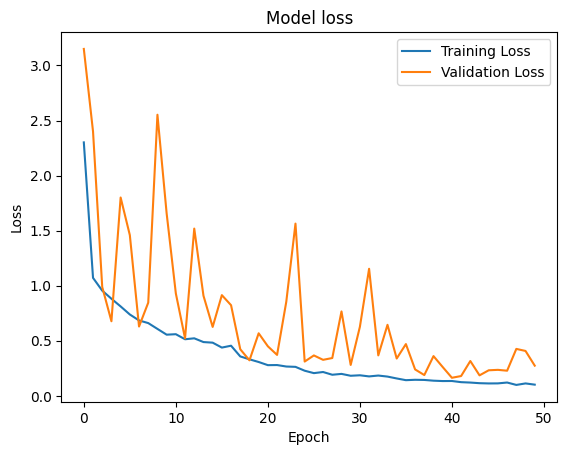

In [ ]:
# Visualisasi akurasi dan loss selama pelatihan
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

•	Menampilkan grafik akurasi dan loss selama testing.<br>
•	Menggunakan Matplotlib untuk memvisualisasi metrik akurasi dan loss pada data Training dan Validation.

# **Evaluasi Model pada Data Testing**

23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step


<Figure size 800x800 with 0 Axes>

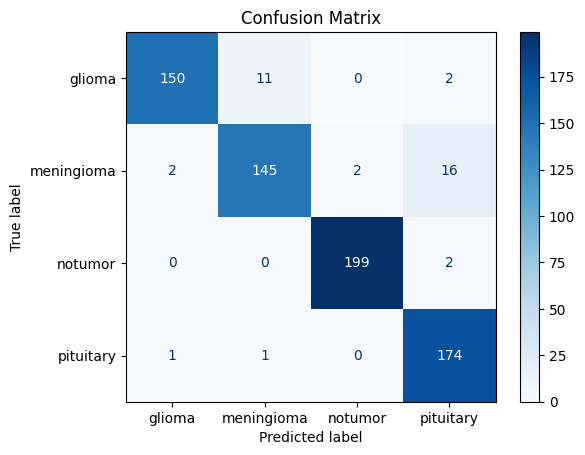

              precision    recall  f1-score   support

      glioma       0.98      0.92      0.95       163
  meningioma       0.92      0.88      0.90       165
     notumor       0.99      0.99      0.99       201
   pituitary       0.90      0.99      0.94       176

    accuracy                           0.95       705
   macro avg       0.95      0.94      0.95       705
weighted avg       0.95      0.95      0.95       705



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Ambil prediksi kelas dari model pada dataset testing
y_pred = np.argmax(model.predict(test_generator), axis=1)

# Ambil label sebenarnya dari dataset testing
y_true = test_generator.classes

# Hitung confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Definisikan kelas label
classes = ["glioma", "meningioma", "notumor", "pituitary"]

# Tampilkan confusion matrix
plt.figure(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Hitung dan tampilkan classification report (precision, recall, F1-score)
report = classification_report(y_true, y_pred, target_names=classes)
print(report)

•	Mengevaluasi performa model menggunakan data Testing.<br>
•	Sebuah tabel yang secara visual menampilkan perbandingan antara prediksi kelas yang dibuat oleh model dengan kelas aktual dari data, sehingga kita bisa melihat dengan jelas di mana model kita membuat kesalahan.<br>
•	Terdapat laporan ringkas yang memberikan nilai-nilai metrik seperti precision, recall, dan F1-score untuk setiap kelas, sehingga kita bisa menilai kinerja model secara lebih detail dan menyeluruh.

# **Check Model Prediksi**

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
Predictions for images labeled as 'notumor':
File: notumor/Te-no_0024.jpg, Predicted: notumor, Actual: notumor


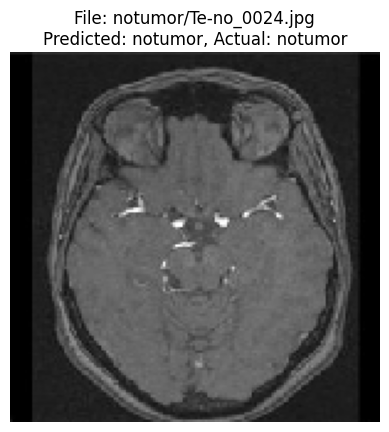

File: notumor/Te-no_0028.jpg, Predicted: notumor, Actual: notumor


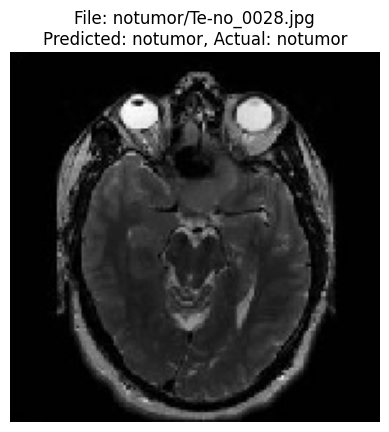

File: notumor/Te-no_0031.jpg, Predicted: notumor, Actual: notumor


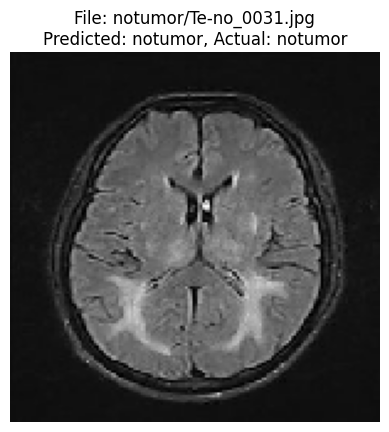

File: notumor/Te-no_0036.jpg, Predicted: notumor, Actual: notumor


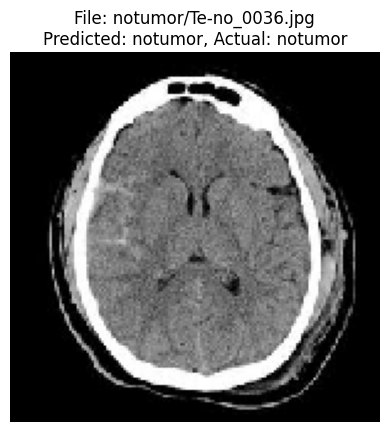

File: notumor/Te-no_0039.jpg, Predicted: notumor, Actual: notumor


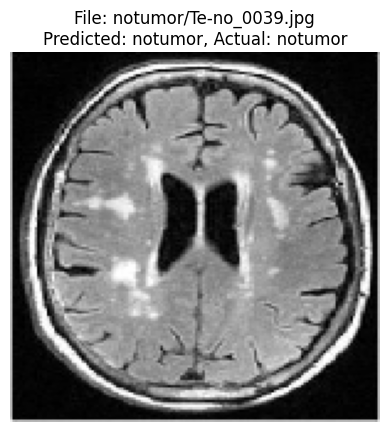

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def check_predictions_with_filenames(label_to_check, test_generator, model):
    # Ambil prediksi model pada dataset uji
    y_pred = np.argmax(model.predict(test_generator), axis=1)

    # Ambil label asli dari dataset uji
    y_true = test_generator.classes

    # Ambil nama kelas dan file dari test_generator
    class_labels = list(test_generator.class_indices.keys())
    filenames = test_generator.filenames

    # Mapping prediksi ke nama kelas
    y_pred_labels = [class_labels[i] for i in y_pred]

    # Tampilkan hasil prediksi untuk label tertentu
    selected_indices = [i for i in range(len(y_true)) if class_labels[y_true[i]] == label_to_check]

    if not selected_indices:
        print(f"No samples found for the label: {label_to_check}")
        return

    print(f"Predictions for images labeled as '{label_to_check}':")
    for idx in selected_indices[:5]:  # Ambil gambar contoh pertama yang sesuai label
        actual_label = class_labels[y_true[idx]]
        predicted_label = y_pred_labels[idx]
        filename = filenames[idx]
        print(f"File: {filename}, Predicted: {predicted_label}, Actual: {actual_label}")

        # Visualisasi gambar
        img_batch, _ = test_generator[idx // test_generator.batch_size]
        img = img_batch[idx % test_generator.batch_size]
        plt.imshow(img)
        plt.title(f"File: {filename}\nPredicted: {predicted_label}, Actual: {actual_label}")
        plt.axis('off')
        plt.show()

# Pilih label untuk diperiksa
label_to_check = "notumor"  # Bisa diganti dengan label lain: "glioma", "meningioma", "notumor", atau "pituitary"
check_predictions_with_filenames(label_to_check, test_generator, model)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
Predictions for images labeled as 'pituitary':
File: pituitary/Te-piTr_0001.jpg, Predicted: pituitary, Actual: pituitary


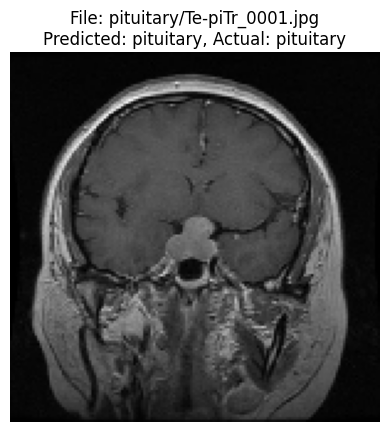

File: pituitary/Te-pi_0017.jpg, Predicted: pituitary, Actual: pituitary


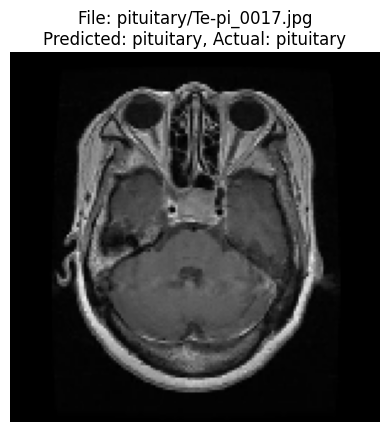

File: pituitary/Te-pi_0036.jpg, Predicted: pituitary, Actual: pituitary


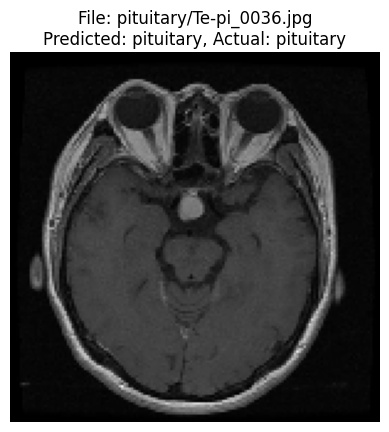

File: pituitary/Te-pi_0045.jpg, Predicted: pituitary, Actual: pituitary


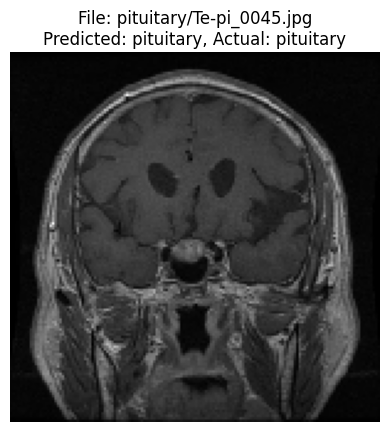

File: pituitary/Te-pi_0055.jpg, Predicted: pituitary, Actual: pituitary


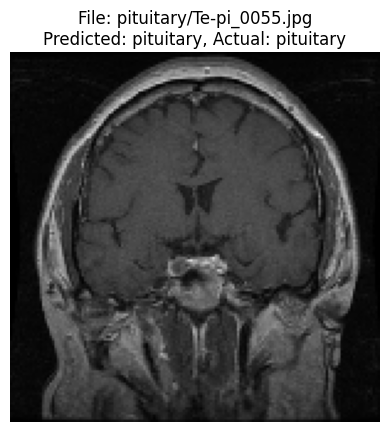

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def check_predictions_with_filenames(label_to_check, test_generator, model):
    # Ambil prediksi model pada dataset uji
    y_pred = np.argmax(model.predict(test_generator), axis=1)

    # Ambil label asli dari dataset uji
    y_true = test_generator.classes

    # Ambil nama kelas dan file dari test_generator
    class_labels = list(test_generator.class_indices.keys())
    filenames = test_generator.filenames

    # Mapping prediksi ke nama kelas
    y_pred_labels = [class_labels[i] for i in y_pred]

    # Tampilkan hasil prediksi untuk label tertentu
    selected_indices = [i for i in range(len(y_true)) if class_labels[y_true[i]] == label_to_check]

    if not selected_indices:
        print(f"No samples found for the label: {label_to_check}")
        return

    print(f"Predictions for images labeled as '{label_to_check}':")
    for idx in selected_indices[:5]:  # Ambil gambar contoh pertama yang sesuai label
        actual_label = class_labels[y_true[idx]]
        predicted_label = y_pred_labels[idx]
        filename = filenames[idx]
        print(f"File: {filename}, Predicted: {predicted_label}, Actual: {actual_label}")

        # Visualisasi gambar
        img_batch, _ = test_generator[idx // test_generator.batch_size]
        img = img_batch[idx % test_generator.batch_size]
        plt.imshow(img)
        plt.title(f"File: {filename}\nPredicted: {predicted_label}, Actual: {actual_label}")
        plt.axis('off')
        plt.show()

# Pilih label untuk diperiksa
label_to_check = "pituitary"  # Bisa diganti dengan label lain: "glioma", "meningioma", "notumor", atau "pituitary"
check_predictions_with_filenames(label_to_check, test_generator, model)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
Predictions for images labeled as 'glioma':
File: glioma/Te-glTr_0000.jpg, Predicted: glioma, Actual: glioma


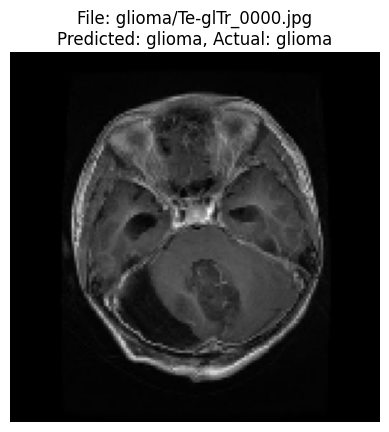

File: glioma/Te-glTr_0006.jpg, Predicted: glioma, Actual: glioma


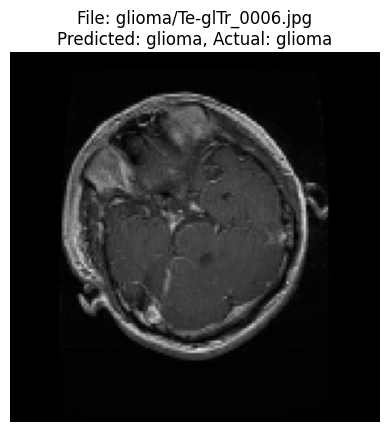

File: glioma/Te-gl_0023.jpg, Predicted: glioma, Actual: glioma


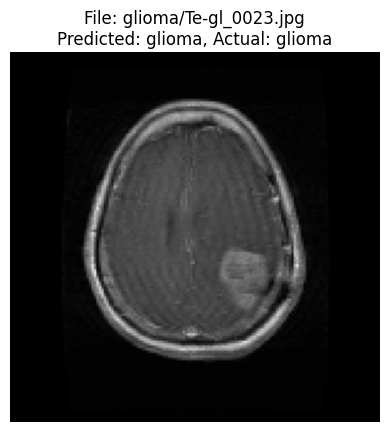

File: glioma/Te-gl_0039.jpg, Predicted: glioma, Actual: glioma


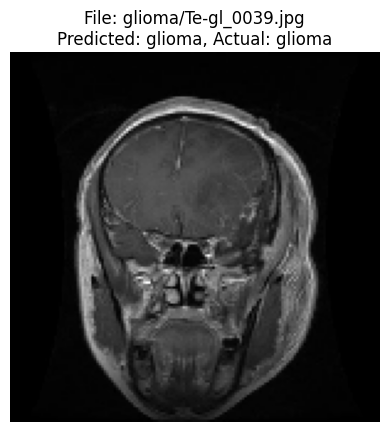

File: glioma/Te-gl_0042.jpg, Predicted: glioma, Actual: glioma


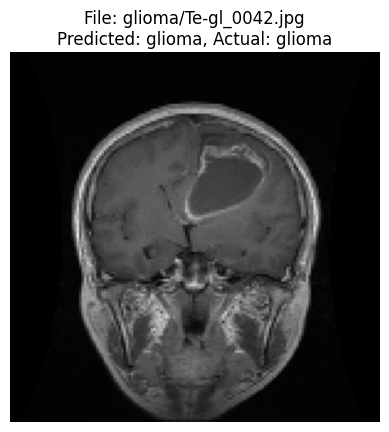

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def check_predictions_with_filenames(label_to_check, test_generator, model):
    # Ambil prediksi model pada dataset uji
    y_pred = np.argmax(model.predict(test_generator), axis=1)

    # Ambil label asli dari dataset uji
    y_true = test_generator.classes

    # Ambil nama kelas dan file dari test_generator
    class_labels = list(test_generator.class_indices.keys())
    filenames = test_generator.filenames

    # Mapping prediksi ke nama kelas
    y_pred_labels = [class_labels[i] for i in y_pred]

    # Tampilkan hasil prediksi untuk label tertentu
    selected_indices = [i for i in range(len(y_true)) if class_labels[y_true[i]] == label_to_check]

    if not selected_indices:
        print(f"No samples found for the label: {label_to_check}")
        return

    print(f"Predictions for images labeled as '{label_to_check}':")
    for idx in selected_indices[:5]:  # Ambil gambar contoh pertama yang sesuai label
        actual_label = class_labels[y_true[idx]]
        predicted_label = y_pred_labels[idx]
        filename = filenames[idx]
        print(f"File: {filename}, Predicted: {predicted_label}, Actual: {actual_label}")

        # Visualisasi gambar
        img_batch, _ = test_generator[idx // test_generator.batch_size]
        img = img_batch[idx % test_generator.batch_size]
        plt.imshow(img)
        plt.title(f"File: {filename}\nPredicted: {predicted_label}, Actual: {actual_label}")
        plt.axis('off')
        plt.show()

# Pilih label untuk diperiksa
label_to_check = "glioma"  # Bisa diganti dengan label lain: "glioma", "meningioma", "notumor", atau "pituitary"
check_predictions_with_filenames(label_to_check, test_generator, model)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
Predictions for images labeled as 'meningioma':
File: meningioma/Te-me_0019.jpg, Predicted: pituitary, Actual: meningioma


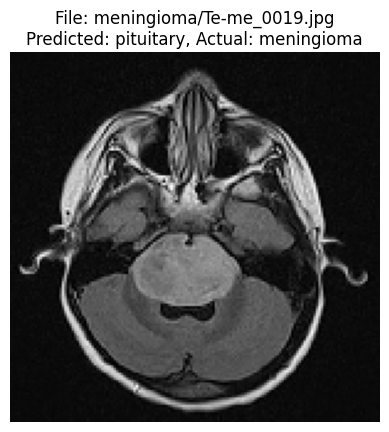

File: meningioma/Te-me_0031.jpg, Predicted: notumor, Actual: meningioma


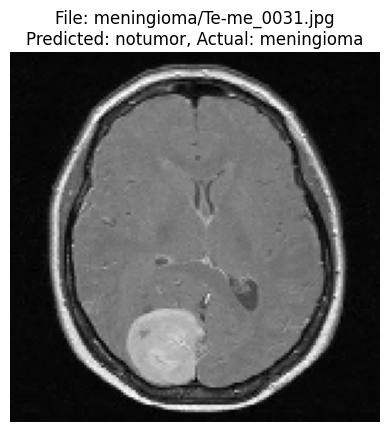

File: meningioma/Te-me_0047.jpg, Predicted: meningioma, Actual: meningioma


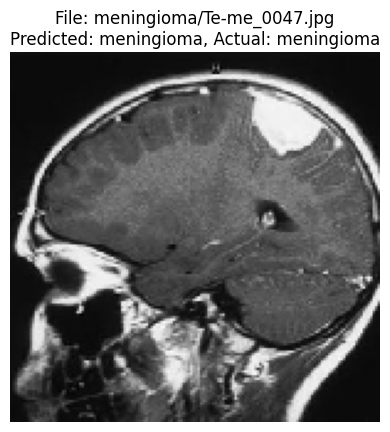

File: meningioma/Te-me_0050.jpg, Predicted: meningioma, Actual: meningioma


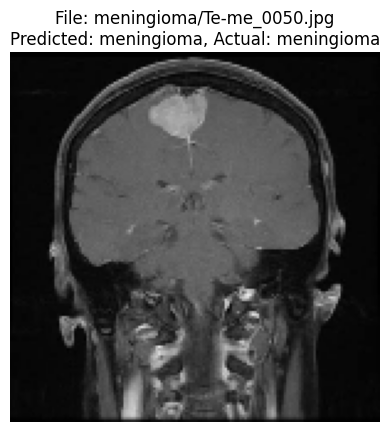

File: meningioma/Te-me_0058.jpg, Predicted: meningioma, Actual: meningioma


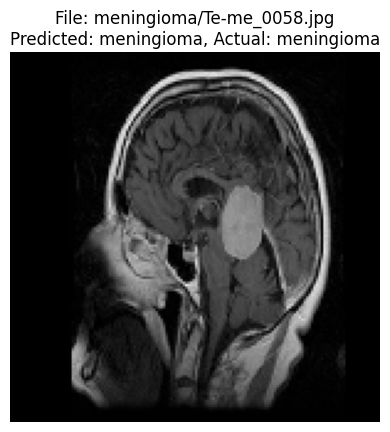

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def check_predictions_with_filenames(label_to_check, test_generator, model):
    # Ambil prediksi model pada dataset uji
    y_pred = np.argmax(model.predict(test_generator), axis=1)

    # Ambil label asli dari dataset uji
    y_true = test_generator.classes

    # Ambil nama kelas dan file dari test_generator
    class_labels = list(test_generator.class_indices.keys())
    filenames = test_generator.filenames

    # Mapping prediksi ke nama kelas
    y_pred_labels = [class_labels[i] for i in y_pred]

    # Tampilkan hasil prediksi untuk label tertentu
    selected_indices = [i for i in range(len(y_true)) if class_labels[y_true[i]] == label_to_check]

    if not selected_indices:
        print(f"No samples found for the label: {label_to_check}")
        return

    print(f"Predictions for images labeled as '{label_to_check}':")
    for idx in selected_indices[:5]:  # Ambil gambar contoh pertama yang sesuai label
        actual_label = class_labels[y_true[idx]]
        predicted_label = y_pred_labels[idx]
        filename = filenames[idx]
        print(f"File: {filename}, Predicted: {predicted_label}, Actual: {actual_label}")

        # Visualisasi gambar
        img_batch, _ = test_generator[idx // test_generator.batch_size]
        img = img_batch[idx % test_generator.batch_size]
        plt.imshow(img)
        plt.title(f"File: {filename}\nPredicted: {predicted_label}, Actual: {actual_label}")
        plt.axis('off')
        plt.show()

# Pilih label untuk diperiksa
label_to_check = "meningioma"  # Bisa diganti dengan label lain: "glioma", "meningioma", "notumor", atau "pituitary"
check_predictions_with_filenames(label_to_check, test_generator, model)